# Import libraries

In [1]:
import matplotlib.pyplot as plt
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
import seaborn as sns
import pandas as pd
import numpy as np

sns.set_style('darkgrid')

import os
from pathlib import Path

# Load datasets

In [2]:
# GET PATHS
root_path = './data'

all_seeds = list(range(1, 8))
all_seeds = list(map(str, all_seeds))
print(all_seeds)

pathes = {}

for path in Path(root_path).iterdir():
    seed = str(path).split('seed_')[-1]
    if seed in all_seeds:
        pathes[seed] = path
display(pathes)


# LOAD IN ONE DATASET
learning_curves = []

for seed in pathes:
    seed_df = pd.read_csv(
        pathes[seed] / "learning curve.csv", 
        index_col=0,
    )
    seed_df.rename({'0': seed}, axis=1, inplace=True)
    learning_curves.append(seed_df)
    
learning_curves = pd.concat(learning_curves, axis=1)
learning_curves = learning_curves[all_seeds] # Sort columns
learning_curves.describe()

['1', '2', '3', '4', '5', '6', '7']


{'7': PosixPath('data/2024-03-26_103819_seed_7'),
 '2': PosixPath('data/2024-03-26_103818_seed_2'),
 '3': PosixPath('data/2024-03-26_103818_seed_3'),
 '6': PosixPath('data/2024-03-26_103819_seed_6'),
 '4': PosixPath('data/2024-03-26_103819_seed_4'),
 '1': PosixPath('data/2024-03-26_103818_seed_1'),
 '5': PosixPath('data/2024-03-26_103819_seed_5')}

,1,2,3,4,5,6,7
count,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000
mean,3.509594,2.539125,3.242997,2.590975,2.992448,3.366597,2.526493
std,2.815633,0.597689,1.464547,0.534131,0.839903,0.089173,0.517598
min,2.029746,1.978085,1.947065,1.971402,1.944724,3.277720,1.981067
25%,2.675513,2.061144,2.061144,2.151025,2.507207,3.318071,2.097617
50%,3.046134,2.182604,2.770871,2.333226,2.826242,3.335576,2.270462
75%,3.340841,3.155271,3.415613,3.171213,3.121285,3.364743,2.999093
max,21.468832,4.741112,7.785267,3.769596,6.068163,3.722469,3.973656


Let us drop "not-working" seeds

In [3]:
seeds_to_drop = ['1', '6']
learning_curves_selected = learning_curves.drop(seeds_to_drop, axis=1)
learning_curves_selected.describe()

,2,3,4,5,7
count,300.000000,300.000000,300.000000,300.000000,300.000000
mean,2.539125,3.242997,2.590975,2.992448,2.526493
std,0.597689,1.464547,0.534131,0.839903,0.517598
min,1.978085,1.947065,1.971402,1.944724,1.981067
25%,2.061144,2.061144,2.151025,2.507207,2.097617
50%,2.182604,2.770871,2.333226,2.826242,2.270462
75%,3.155271,3.415613,3.171213,3.121285,2.999093
max,4.741112,7.785267,3.769596,6.068163,3.973656


means


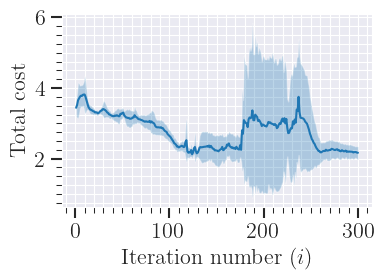

medians


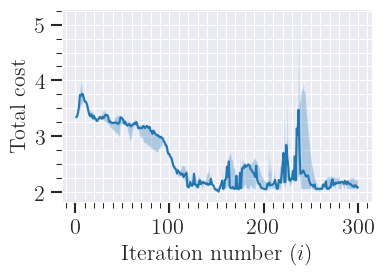

In [15]:
# sns.set(rc={"xtick.bottom" : True, "ytick.left" : True})
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "mathptmx",
    "font.size": 16,
    "xtick.bottom" : True, 
    "ytick.left" : True,
    'xtick.major.size': 8,
    'xtick.major.width': 1.5,
    'xtick.minor.size': 4,
    'xtick.minor.width': 0.75,
    'ytick.major.size': 8,
    'ytick.major.width': 1.5,
    'ytick.minor.size': 4,
    'ytick.minor.width': 0.75,
})


def plot_total_cost(df, plot_type='means', savefig=False):
    if plot_type == 'means':
        central = df.mean(axis=1)
        stds = df.std(axis=1)
        bottom = central - stds
        top = central + stds
    elif plot_type == 'medians':
        central = df.median(axis=1)
        bottom = df.quantile(0.25, axis=1)
        top = df.quantile(0.75, axis=1)
    print(plot_type)
    
    fig, ax = plt.subplots(1, 1, figsize=(4,2.5))
    ax.set_ylabel("Total cost")
    ax.set_xlabel("Iteration number $(i)$")
    ax.xaxis.set_minor_locator(MultipleLocator(10))
    ax.yaxis.set_minor_locator(MultipleLocator(0.25))
    ax.xaxis.grid(True, which='minor')
    ax.yaxis.grid(True, which='minor')
    
    central.plot()
    plt.fill_between(central.index, bottom, top, alpha=0.3)
    
    # plt.tight_layout(pad=0.5)
    if savefig:
        plt.savefig("learning_curve.pdf", dpi=400)
    plt.show();

plot_total_cost(learning_curves_selected, savefig=False)
plot_total_cost(learning_curves_selected, plot_type='medians', savefig=False)

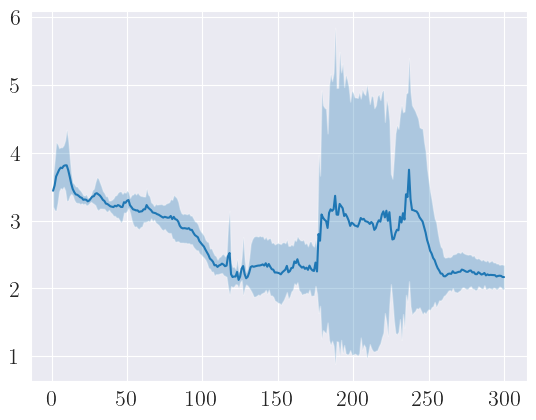

In [7]:
plot_means(learning_curves_selected)

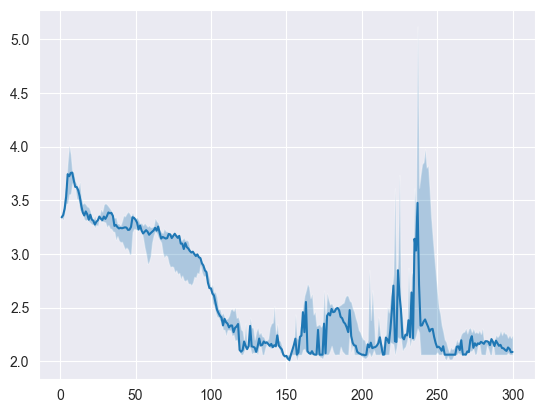

In [25]:
plot_medians(learning_curves_selected)

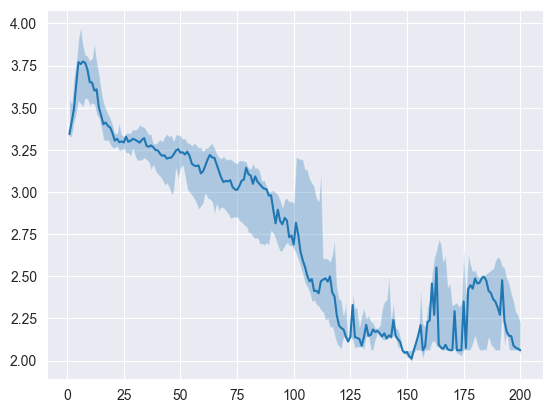

In [17]:
plot_medians(learning_curves_selected.iloc[:200])

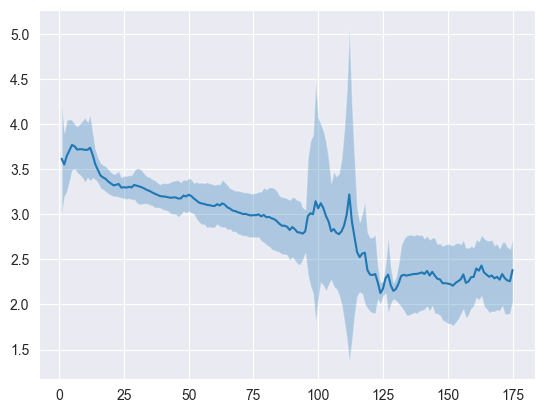

In [18]:
plot_means(learning_curves_selected.iloc[:175])

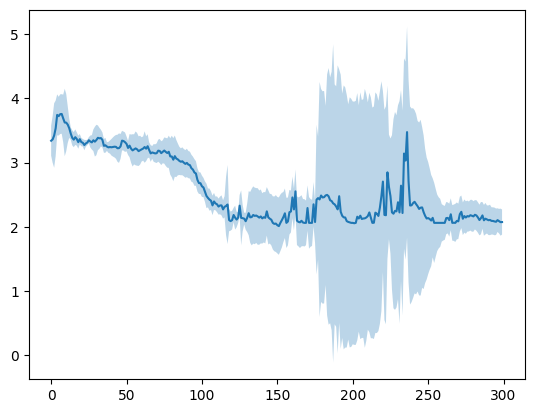

In [117]:
means = pd.concat(learning_curves, axis=1).median(axis=1)
stds = pd.concat(learning_curves, axis=1).std(axis=1)
import matplotlib.pyplot as plt
means.plot()
plt.fill_between(means.index, means - stds, means + stds, alpha=0.3)